# Single run Study

Set root path

In [1]:
PATH_PREFIX = '../../../'
import sys
sys.path.append(PATH_PREFIX)

Import libs

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import yaml
import csv
from utils.plot import *
from utils.fitness_controller import FitnessController
from compress_optim import CompressConfig, load_comp_config, fit_from_vals

Settings

In [3]:
NET_TYPE = 'relu'
SAVE_PLOTS = True
SAVE_PLOTS_LOC = os.path.join(PATH_PREFIX, 'results/graphs/')
SAVE_PLOT_ID = f'{NET_TYPE}_locked'
ACC_TRESHOLD = 0.01

See data

In [4]:
plt_data = pd.read_csv(os.path.join(PATH_PREFIX, f'results/lenet_{NET_TYPE}_compress_50_locked/run7/PSO_save.csv'))
plt_data

,time,position,representation,velocity,accuracy,accuracy_loss,compression,share_t,train_t,acc_t
0,0,"[3.096606863689974, 0, 23.176879912901434, 36....","[37, 39, 17, 8, 12]","[-4, -1.3107200000000006, 2.2092956466616283, ...",0.9842,0.0004,6.191575,0.804299,0.0,0.529366
1,0,"[0, 0, 29.468695609807053, 42.072750655840544, 0]","[4, 6, 25, 39, 27]","[-0.14073748835532812, -0.04278066219566728, 2...",0.9840,0.0006,7.624994,1.142507,0.0,0.534835
2,0,"[0, 0, 28.182990524724374, 47.37683594664339, 0]","[19, 11, 22, 19, 46]","[-0.17592186044416014, -0.09007199254741001, 1...",0.9832,0.0014,5.527368,1.004730,0.0,0.530694
3,0,"[0, 0, 24.14770359420664, 38.75966958339883, 0]","[10, 46, 6, 6, 40]","[-0.17592186044416014, -0.6710886400000003, 0....",0.9824,0.0022,7.019561,0.574136,0.0,0.543007
4,0,"[0, 0, 26.318089206075022, 40.8464992634935, 0]","[45, 19, 27, 45, 27]","[-0.6710886400000003, -0.1232094368473776, -0....",0.9850,-0.0004,4.923056,1.286017,0.0,0.540968
...,...,...,...,...,...,...,...,...,...,...
395,19,"[0, 0, 25.70495767664093, 42.57257664269025, 0]","[2, 4, 29, 45, 4]","[-0.5941317093318906, -0.17592186044416014, -0...",0.9660,0.0186,12.828268,1.133388,0.0,0.529181
396,19,"[0, 0, 23.589304986445793, 41.501758986161406, 0]","[2, 4, 27, 44, 4]","[-0.3435973836800002, -0.42949672960000024, -1...",0.9654,0.0192,12.829294,1.137718,0.0,0.529475
397,19,"[0, 0, 24.140007928124433, 45.80273396089128, 0]","[2, 4, 28, 48, 4]","[-0.5368709120000003, -0.06422124849305198, -2...",0.9674,0.0172,12.826566,1.180253,0.0,0.528019
398,19,"[0, 0, 26.867075050735163, 43.86053488676559, 0]","[2, 4, 30, 46, 4]","[-2.0480000000000005, -2.0480000000000005, -1....",0.9662,0.0184,12.827439,1.209093,0.0,0.528719


Plot Data

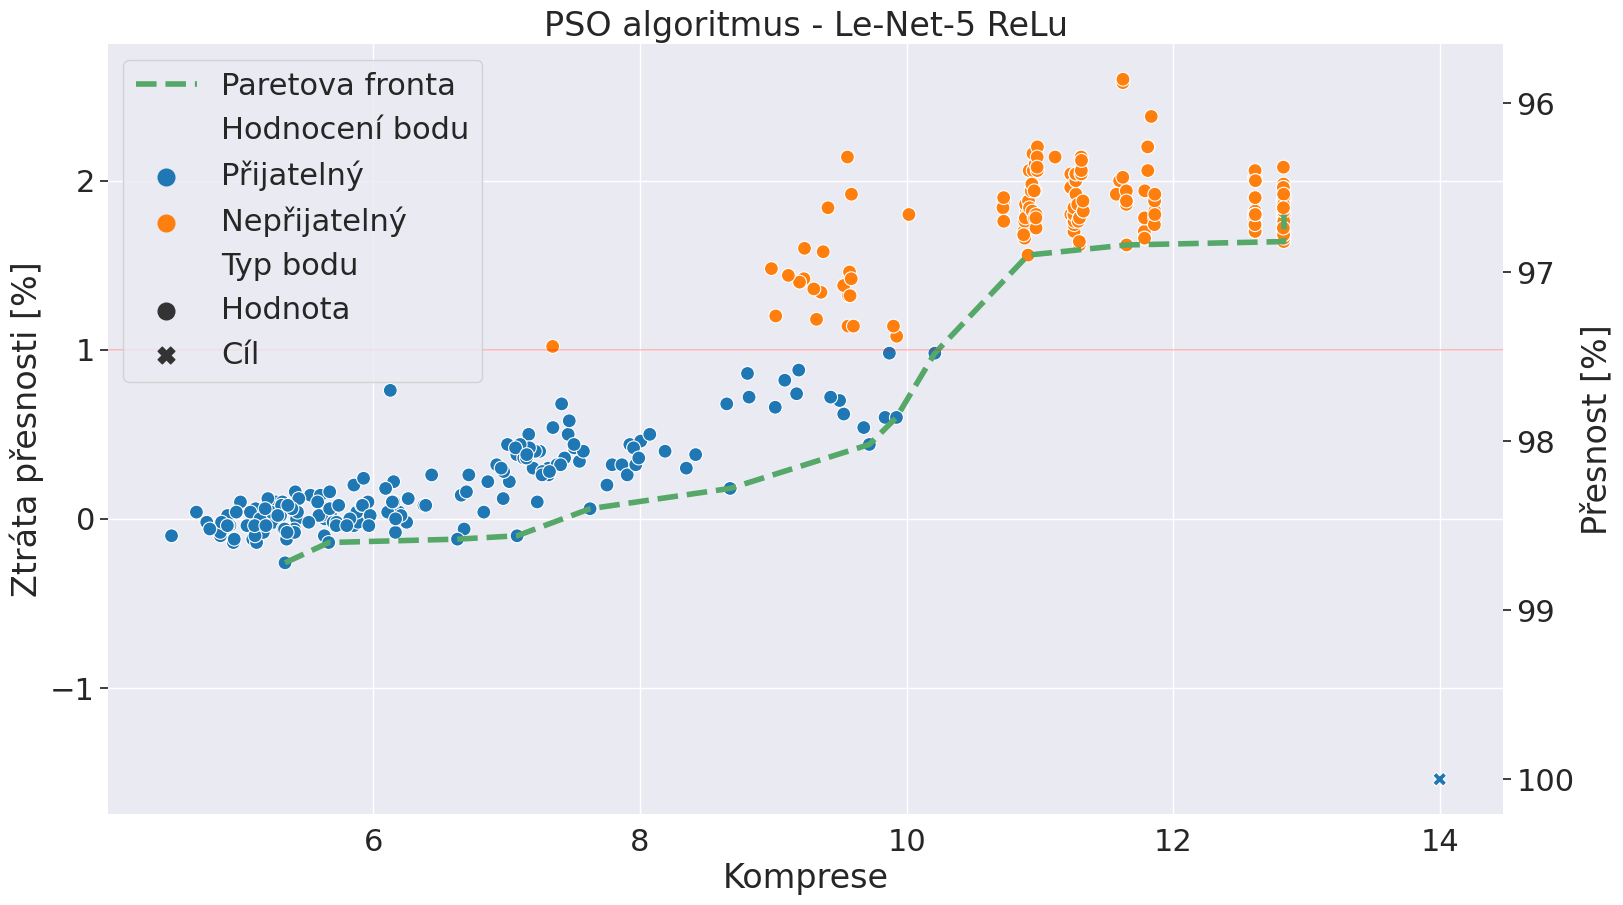

In [5]:
plot_alcr(plt_data, 0.01, [1.0, 14.0], True, filter=0.05)
plt.title('PSO algoritmus - Le-Net-5 ReLu')

if SAVE_PLOTS:
    plt.savefig(os.path.join(SAVE_PLOTS_LOC, f'scatter{SAVE_PLOT_ID}.pdf'))